In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [3]:
pip install scikit-plot

In [5]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# we can see that there are few value set to 0 so we need to replace it.

In [8]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())


In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

{'boxes': [<matplotlib.lines.Line2D at 0x7fd90a988650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd90a914710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd90a977bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd90a91e210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd90a988c50>,
  <matplotlib.lines.Line2D at 0x7fd90a9141d0>]}

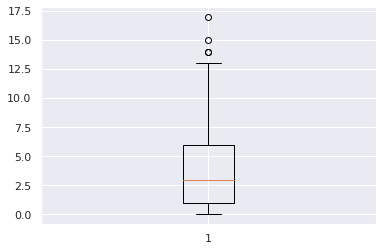

In [10]:
# checking outliers
plt.boxplot(data['Pregnancies'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd90a44c4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd90a452510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd90a458550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd90a452fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd90a44ca10>,
  <matplotlib.lines.Line2D at 0x7fd90a44cf90>]}

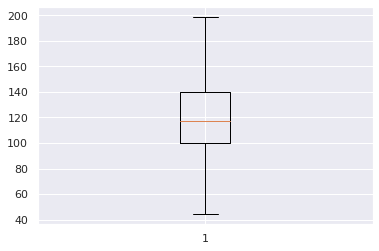

In [11]:
plt.boxplot(data['Glucose'])


{'boxes': [<matplotlib.lines.Line2D at 0x7fd90a3c9a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd90a3cca90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd90a3d4ad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd90a3d4590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd90a3c9f90>,
  <matplotlib.lines.Line2D at 0x7fd90a3cc550>]}

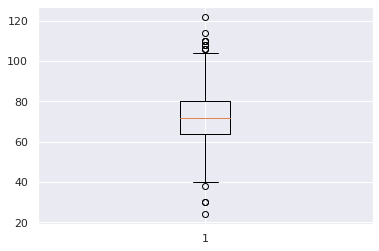

In [12]:
plt.boxplot(data['BloodPressure'])


{'boxes': [<matplotlib.lines.Line2D at 0x7fd90a3bb510>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd90a341550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd90a348590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd90a348050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd90a3bba50>,
  <matplotlib.lines.Line2D at 0x7fd90a3bbfd0>]}

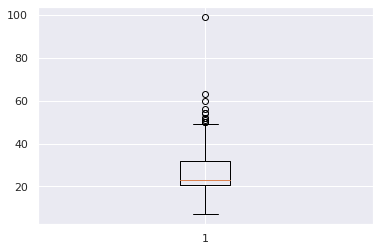

In [13]:
plt.boxplot(data['SkinThickness'])


{'boxes': [<matplotlib.lines.Line2D at 0x7fd90a323510>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd90a329550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd90a332590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd90a332050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd90a323a50>,
  <matplotlib.lines.Line2D at 0x7fd90a323fd0>]}

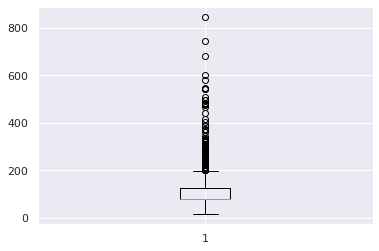

In [14]:
plt.boxplot(data['Insulin'])


{'boxes': [<matplotlib.lines.Line2D at 0x7fd90a28a610>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd90a291650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd90a29a690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd90a29a150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd90a28ab50>,
  <matplotlib.lines.Line2D at 0x7fd90a291110>]}

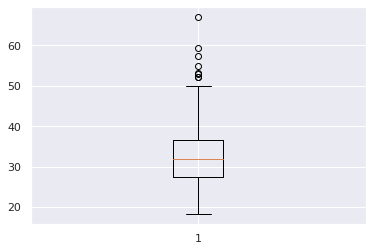

In [15]:
plt.boxplot(data['BMI'])


{'boxes': [<matplotlib.lines.Line2D at 0x7fd90a2756d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd90a27b710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd90a202750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd90a202210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd90a275c10>,
  <matplotlib.lines.Line2D at 0x7fd90a27b1d0>]}

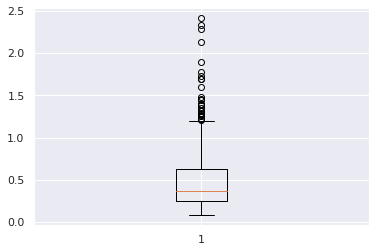

In [16]:
plt.boxplot(data['DiabetesPedigreeFunction'])


{'boxes': [<matplotlib.lines.Line2D at 0x7fd90a1dce10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd90a1e2e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd90a1e9e90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd90a1e9950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd90a1e2390>,
  <matplotlib.lines.Line2D at 0x7fd90a1e2910>]}

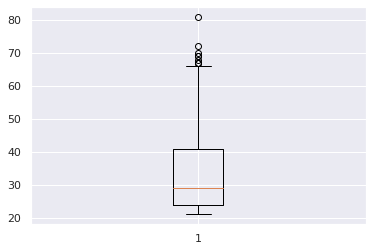

In [17]:
plt.boxplot(data['Age'])


{'boxes': [<matplotlib.lines.Line2D at 0x7fd90a14bc50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd90a154c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd90a15bcd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd90a15b790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd90a1541d0>,
  <matplotlib.lines.Line2D at 0x7fd90a154750>]}

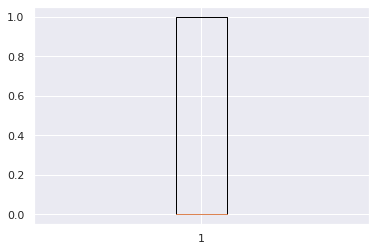

In [18]:
plt.boxplot(data['Outcome'])


In [19]:
# As we can see that there are multiple outliers so we need to handle it.

In [20]:
q = data['Pregnancies'].quantile(0.98)
# we are removing top 2% data form the pregnancies
data_clean = data[data['Pregnancies']<q]
q = data_clean['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_clean = data_clean[data_clean['BMI']<q]
q = data_clean['SkinThickness'].quantile(0.99)
# we are removing top 1% of data from the SkinThickness column
data_clean = data_clean[data_clean['SkinThickness']<q]
q = data_clean['Insulin'].quantile(0.95)
# we are  removing top 5% data from the Insulin column
data_clean = data_clean[data_clean['Insulin']<q]
q = data_clean['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing top 1% of the data from DiabetesPedigreeFunction column
data_clean = data_clean[data_clean['DiabetesPedigreeFunction']<q]
q = data_clean['Age'].quantile(0.99)
data_clean = data_clean[data_clean['Age']<q]
 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

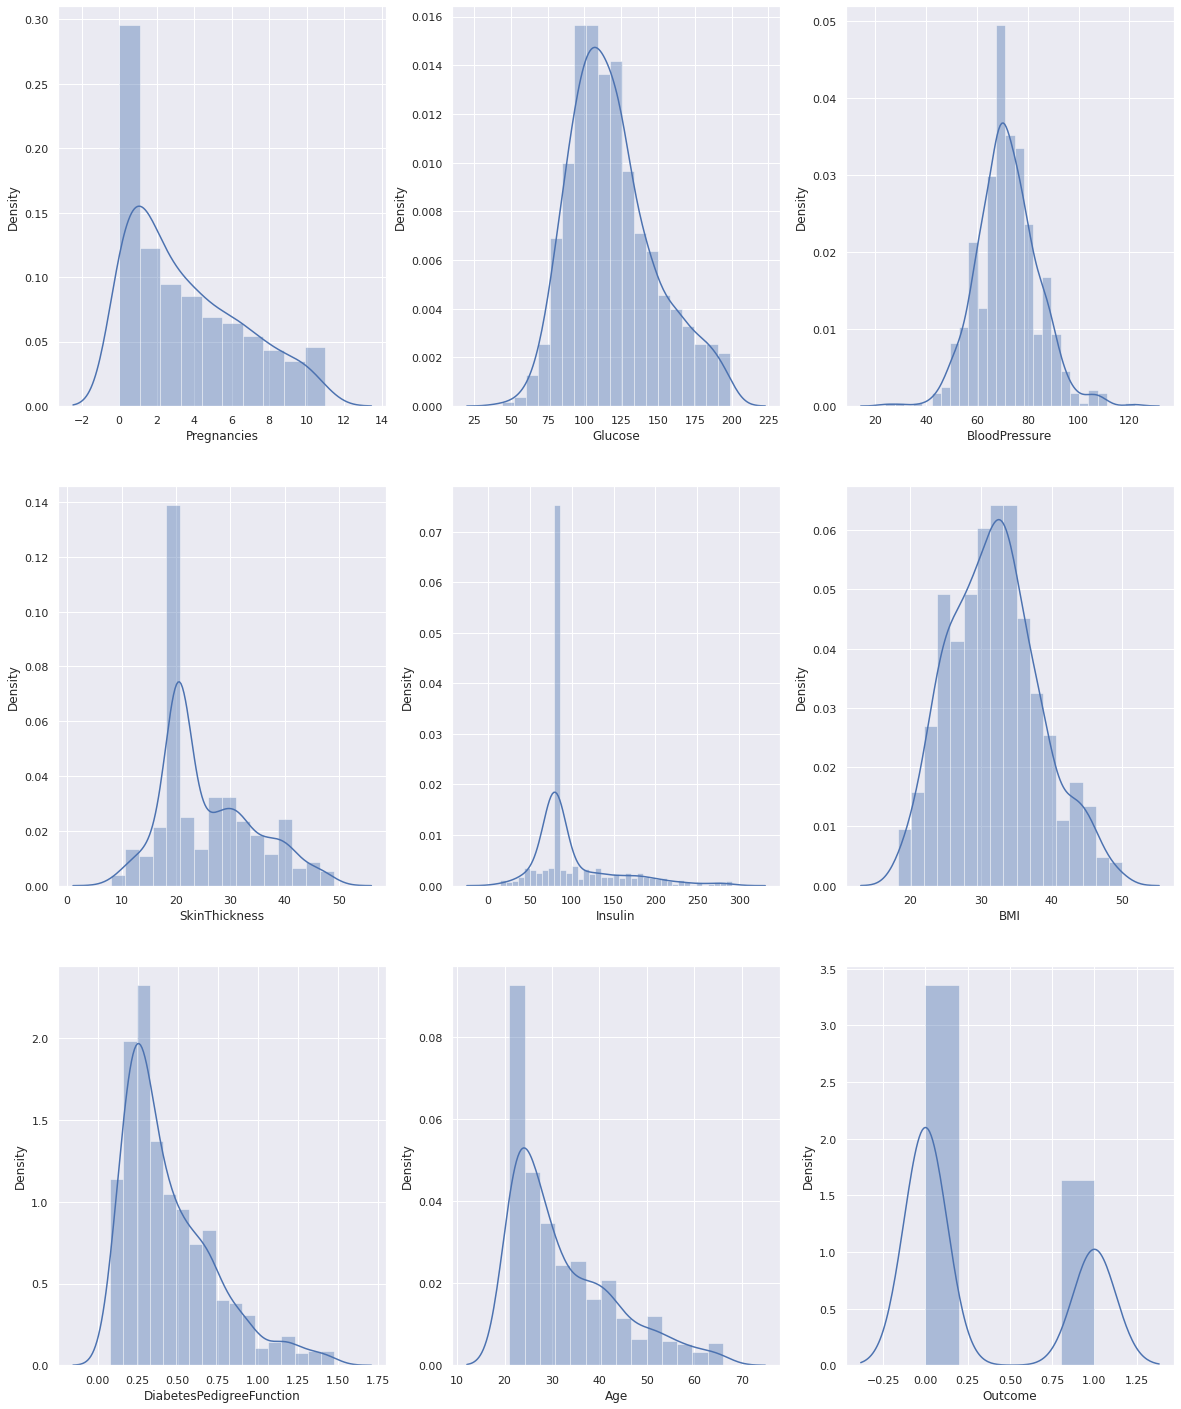

In [21]:
# Let's see how the data is distributed in every column
plt.figure(figsize=(20,25), facecolor= 'white')
plotnumber = 1

# interating for all the column
for column in data_clean:
  if plotnumber<=9:
    ax = plt.subplot(3,3, plotnumber)
    sns.distplot(data_clean[column])
  plotnumber+=1
plt.show()

In [24]:
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [34]:
# multicollinearity check
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Feature'] = x.columns
vif

,vif,Feature
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [35]:
# all the values are below 5 
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y , test_size=0.25, random_state=43)

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
model = GaussianNB()
model.fit(x_train,y_train)


GaussianNB()

In [40]:
# Prediction 
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [41]:
accuracy_score(y_test,y_pred)

0.7552083333333334

In [43]:
# confussion metrics
conf_met = confusion_matrix(y_test, y_pred)
conf_met

array([[107,  17],
       [ 30,  38]])

In [44]:
TP = conf_met[0][0]
FP = conf_met[0][1]
FN = conf_met[1][0]
TN = conf_met[1][1]


In [45]:
# Using formula
# accuracy
Accuracy = (TP + TN)/(TP+TN+FN+FP)
Accuracy

0.7552083333333334

In [47]:
# Precision
precission = TP/(TP+FP)
precission

0.8629032258064516

In [49]:
# Recall 
recall = TP/(TP+FN)
recall

0.781021897810219

In [50]:
#F1_score
F1 = 2*(recall * precission)/(recall + precission)
F1

0.8199233716475097

In [51]:
# auc
auc = roc_auc_score(y_test,y_pred)

In [52]:
auc

0.7108633776091082